In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
sns.set_style('darkgrid')
plt.style.use('dark_background')

### Initial Dataset

In [2]:
data = pd.read_csv("drivingPattern (discrete).csv")
data.head()

,Target,AccMeanX,AccMeanY,AccMeanZ,AccCovX,AccCovY,AccCovZ,AccSkewX,AccSkewY,AccSkewZ,...,GyroMaxZ,GyroVarX,GyroVarY,GyroVarZ,GyroMedianX,GyroMedianY,GyroMedianZ,GyroStdX,GyroStdY,GyroStdZ
0,1,0.285339,-0.138611,-0.957764,0.022150,0.003975,0.001926,0.867594,-1.305868,-0.507254,...,0.832061,0.761120,0.184372,0.262859,-0.286260,4.251908,0.706107,0.872422,0.429385,0.512697
1,1,0.313477,-0.161670,-0.956250,0.020571,0.005640,0.001456,0.002474,-0.395088,-0.677572,...,0.832061,3.061080,0.585991,0.270340,0.335878,3.969466,0.587786,1.749594,0.765501,0.519942
2,1,0.325195,-0.158325,-0.950155,0.017281,0.004579,0.001388,-0.354212,-0.603657,-0.984635,...,0.832061,3.137076,0.552431,0.905518,-0.286260,3.832061,0.240458,1.771179,0.743257,0.951587
3,1,0.336565,-0.172468,-0.937640,0.015305,0.005216,0.002253,-0.655653,-0.152454,-0.040530,...,0.832061,2.809524,3.963056,0.893127,0.335878,3.969466,-0.106870,1.676163,1.990743,0.945054
4,1,0.337860,-0.164185,-0.941681,0.013132,0.005020,0.002062,-0.718488,-0.446061,0.250539,...,0.832061,2.667567,3.414394,0.799787,-0.286260,4.038168,-0.179389,1.633269,1.847808,0.894308


# EDA

In [3]:
data.Target.value_counts()

Target
3    5899
2    4845
1    4233
4    3757
Name: count, dtype: int64

<Axes: >

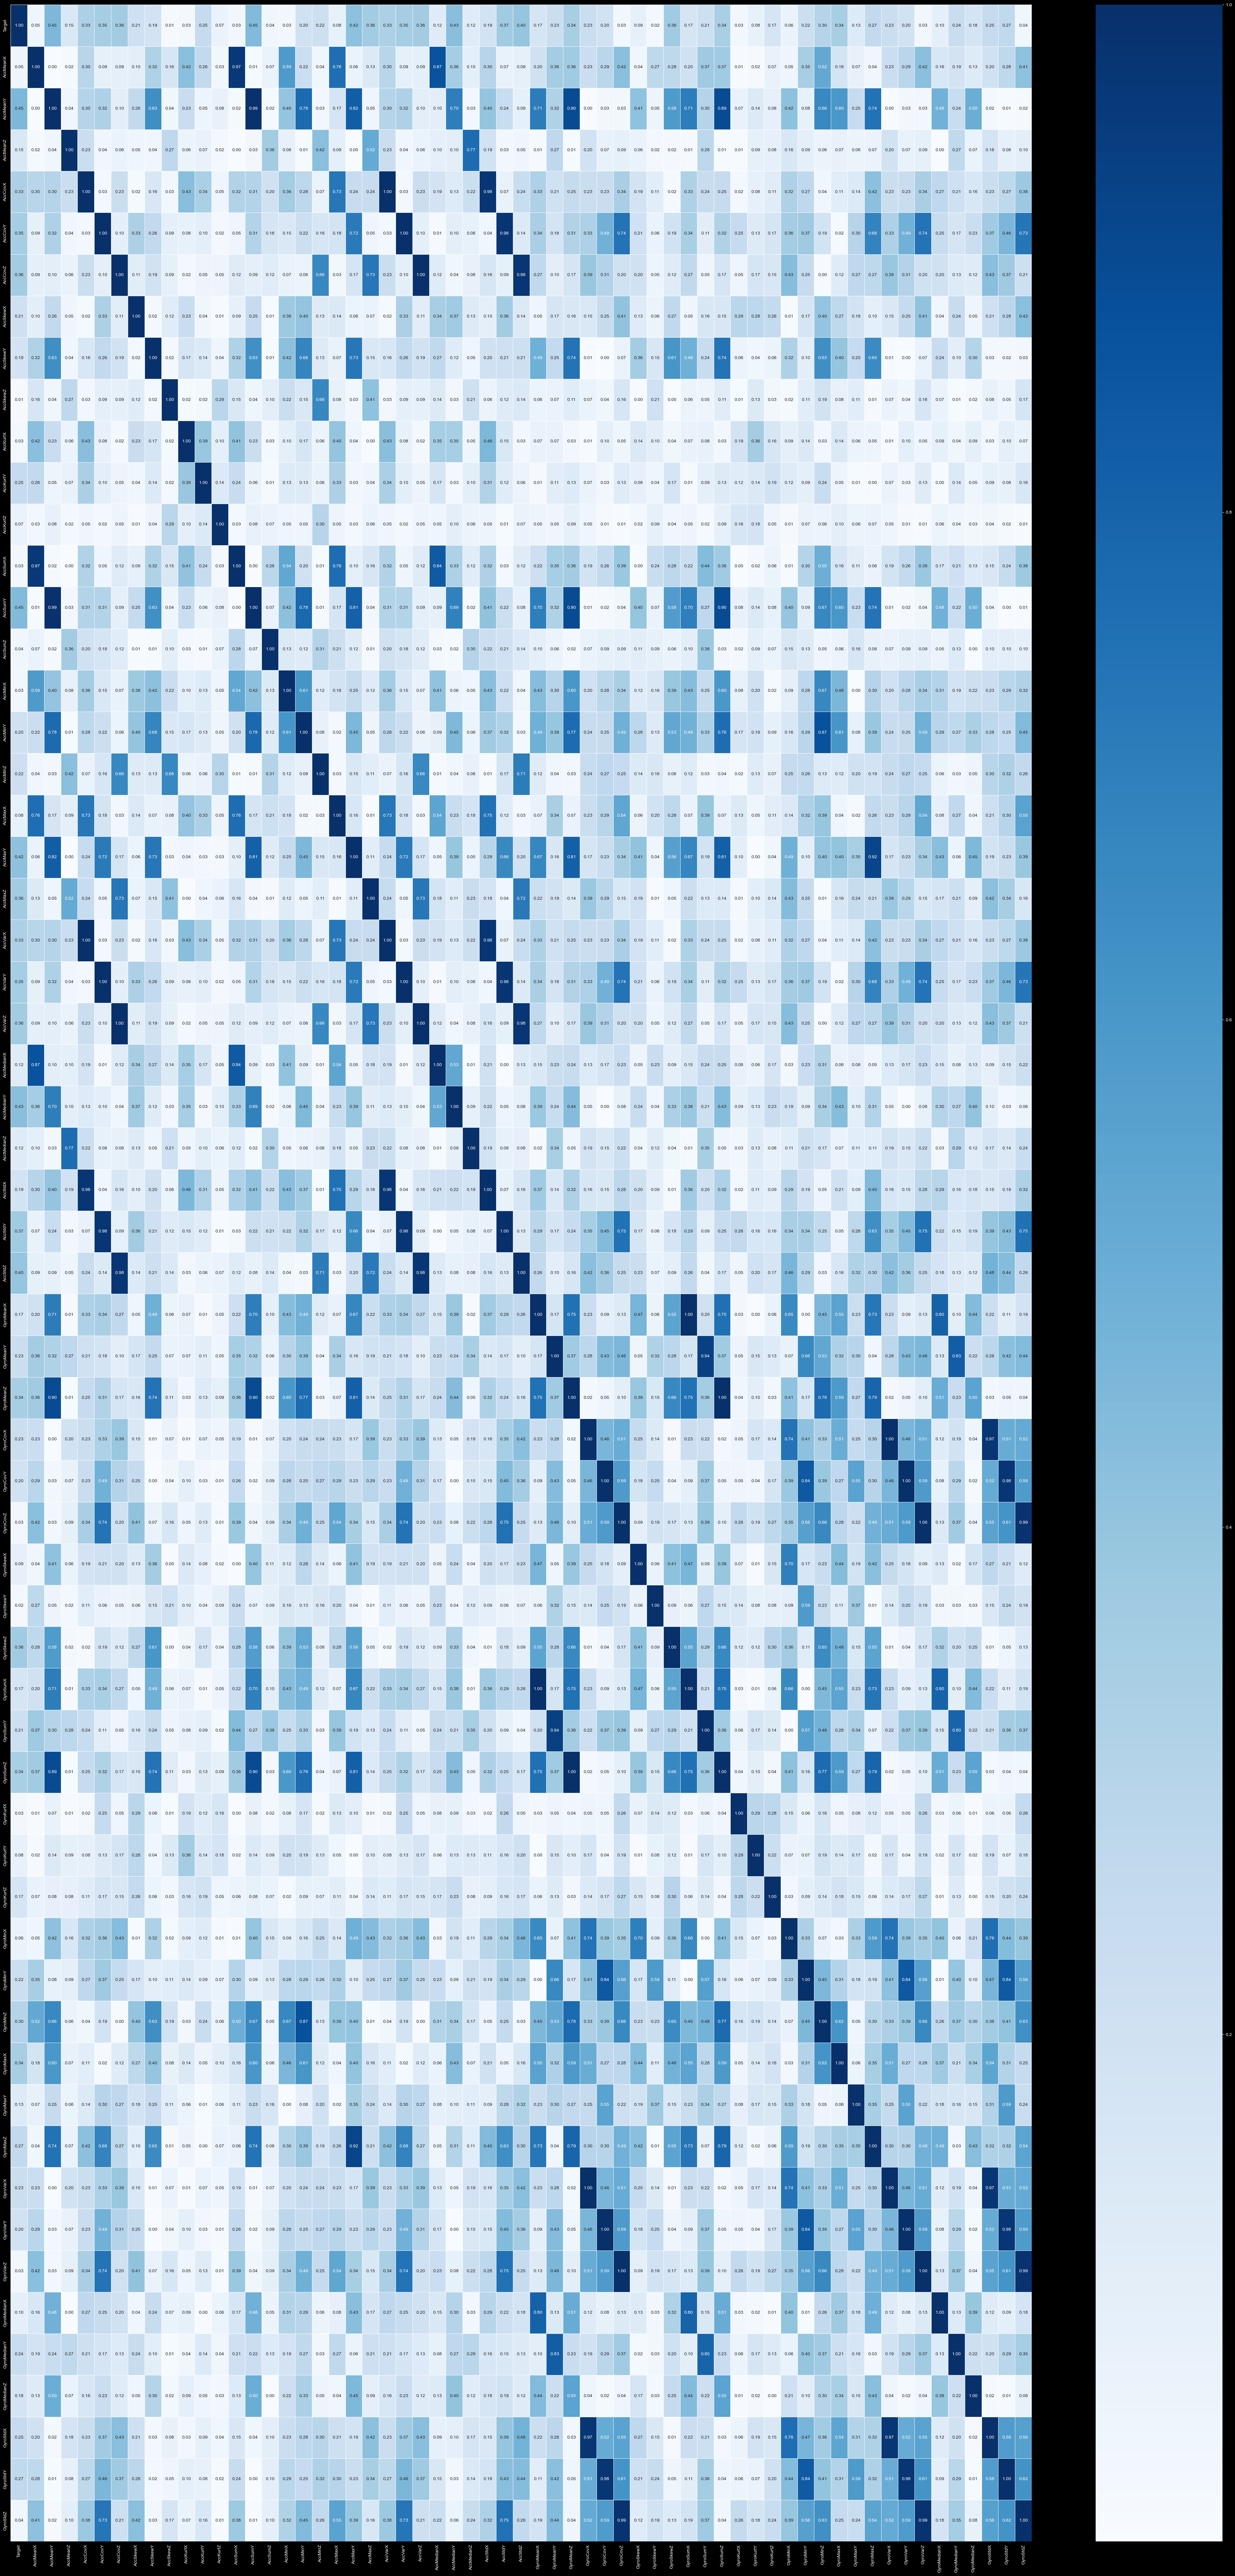

In [5]:
# correlation matrix
corr_matrix = data.corr().abs() 
plt.figure(figsize=(50, 100))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="Blues", linewidths=0.5)

In [6]:
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
upper_tri

,Target,AccMeanX,AccMeanY,AccMeanZ,AccCovX,AccCovY,AccCovZ,AccSkewX,AccSkewY,AccSkewZ,...,GyroMaxZ,GyroVarX,GyroVarY,GyroVarZ,GyroMedianX,GyroMedianY,GyroMedianZ,GyroStdX,GyroStdY,GyroStdZ
Target,NaN,0.050351,0.454897,0.149323,0.332083,0.354118,0.361210,0.208813,0.185366,0.014248,...,0.265730,0.227489,0.195037,0.030372,0.096142,0.235868,0.177255,0.250925,0.268754,0.039703
AccMeanX,NaN,NaN,0.000464,0.019007,0.295835,0.086974,0.091896,0.100209,0.317319,0.161508,...,0.041536,0.225000,0.285706,0.423218,0.157636,0.186380,0.127370,0.197712,0.275089,0.414629
AccMeanY,NaN,NaN,NaN,0.038266,0.300992,0.322535,0.103885,0.258980,0.634430,0.042261,...,0.744737,0.002182,0.028228,0.030592,0.484922,0.235601,0.503934,0.024426,0.011084,0.015244
AccMeanZ,NaN,NaN,NaN,NaN,0.227914,0.035367,0.064103,0.047834,0.037521,0.270917,...,0.068620,0.195224,0.071102,0.089282,0.001422,0.266240,0.065430,0.177710,0.082224,0.102032
AccCovX,NaN,NaN,NaN,NaN,NaN,0.027147,0.229094,0.019000,0.158981,0.031341,...,0.421568,0.229443,0.231391,0.337640,0.271046,0.208065,0.158135,0.227446,0.273686,0.380757
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GyroMedianY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.215792,0.197412,0.292734,0.353927
GyroMedianZ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.015124,0.008164,0.080000
GyroStdX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.580766,0.564112
GyroStdY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.619812


In [7]:
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.85)]
to_drop

['AccSumX',
 'AccSumY',
 'AccVarX',
 'AccVarY',
 'AccVarZ',
 'AccMedianX',
 'AccStdX',
 'AccStdY',
 'AccStdZ',
 'GyroMeanZ',
 'GyroSumX',
 'GyroSumY',
 'GyroSumZ',
 'GyroMinZ',
 'GyroMaxZ',
 'GyroVarX',
 'GyroVarY',
 'GyroVarZ',
 'GyroStdX',
 'GyroStdY',
 'GyroStdZ']

In [8]:
data_filtered = data.drop(columns=to_drop)
data_filtered

,Target,AccMeanX,AccMeanY,AccMeanZ,AccCovX,AccCovY,AccCovZ,AccSkewX,AccSkewY,AccSkewZ,...,GyroKurtX,GyroKurtY,GyroKurtZ,GyroMinX,GyroMinY,GyroMaxX,GyroMaxY,GyroMedianX,GyroMedianY,GyroMedianZ
0,1,0.285339,-0.138611,-0.957764,0.022150,0.003975,0.001926,0.867594,-1.305868,-0.507254,...,-4.710496,-4.035868,2.914796,-0.923664,3.694656,0.786260,4.564885,-0.286260,4.251908,0.706107
1,1,0.313477,-0.161670,-0.956250,0.020571,0.005640,0.001456,0.002474,-0.395088,-0.677572,...,1.633018,0.846742,-2.932893,-0.923664,2.694656,3.351145,4.564885,0.335878,3.969466,0.587786
2,1,0.325195,-0.158325,-0.950155,0.017281,0.004579,0.001388,-0.354212,-0.603657,-0.984635,...,1.663170,-1.192246,1.540639,-1.503817,2.694656,3.351145,4.564885,-0.286260,3.832061,0.240458
3,1,0.336565,-0.172468,-0.937640,0.015305,0.005216,0.002253,-0.655653,-0.152454,-0.040530,...,0.434190,4.642007,-0.680104,-1.503817,2.694656,3.351145,8.725191,0.335878,3.969466,-0.106870
4,1,0.337860,-0.164185,-0.941681,0.013132,0.005020,0.002062,-0.718488,-0.446061,0.250539,...,0.737750,5.422661,-0.817133,-1.503817,2.694656,3.351145,8.725191,-0.286260,4.038168,-0.179389
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18729,4,0.273228,-0.094552,-0.983939,0.055210,0.034427,0.002588,0.458098,-0.614773,0.529063,...,1.180110,-0.312441,9.473514,-1.961832,2.030534,3.396947,6.648855,-0.500000,4.526718,1.083969
18730,4,0.264683,-0.092791,-0.976266,0.050594,0.033875,0.001917,0.479824,-0.640988,1.008758,...,1.954504,-0.517692,12.822557,-1.961832,2.030534,3.396947,5.572519,-0.500000,4.526718,1.083969
18731,4,0.257098,-0.091030,-0.976039,0.047140,0.033445,0.001903,0.532820,-0.673323,1.009590,...,2.076821,-0.518348,12.914320,-1.961832,2.030534,3.396947,5.572519,-0.500000,4.522901,1.083969
18732,4,0.257132,-0.091047,-0.978446,0.047143,0.033445,0.002054,0.532226,-0.672990,0.987714,...,2.017343,-0.587249,12.851945,-1.961832,2.030534,3.396947,5.572519,-0.500000,4.538168,1.083969


In [10]:
data_filtered.columns

Index(['Target', 'AccMeanX', 'AccMeanY', 'AccMeanZ', 'AccCovX', 'AccCovY',
       'AccCovZ', 'AccSkewX', 'AccSkewY', 'AccSkewZ', 'AccKurtX', 'AccKurtY',
       'AccKurtZ', 'AccSumZ', 'AccMinX', 'AccMinY', 'AccMinZ', 'AccMaxX',
       'AccMaxY', 'AccMaxZ', 'AccMedianY', 'AccMedianZ', 'GyroMeanX',
       'GyroMeanY', 'GyroCovX', 'GyroCovY', 'GyroCovZ', 'GyroSkewX',
       'GyroSkewY', 'GyroSkewZ', 'GyroKurtX', 'GyroKurtY', 'GyroKurtZ',
       'GyroMinX', 'GyroMinY', 'GyroMaxX', 'GyroMaxY', 'GyroMedianX',
       'GyroMedianY', 'GyroMedianZ'],
      dtype='object')

In [14]:
features = ['AccMeanX', 'AccMeanY', 'AccMeanZ', 'GyroMeanX', 'GyroMeanY', 'GyroMeanZ', 'Target']
data_filtered = data[features]

In [15]:
data_filtered.head()

,AccMeanX,AccMeanY,AccMeanZ,GyroMeanX,GyroMeanY,GyroMeanZ,Target
0,0.285339,-0.138611,-0.957764,-0.177481,4.190840,0.498092,1
1,0.313477,-0.161670,-0.956250,0.528244,3.891603,0.377099,1
2,0.325195,-0.158325,-0.950155,0.189567,3.773537,0.038168,1
3,0.336565,-0.172468,-0.937640,0.356598,4.480916,-0.102508,1
4,0.337860,-0.164185,-0.941681,0.176527,4.434160,-0.167939,1


<Axes: >

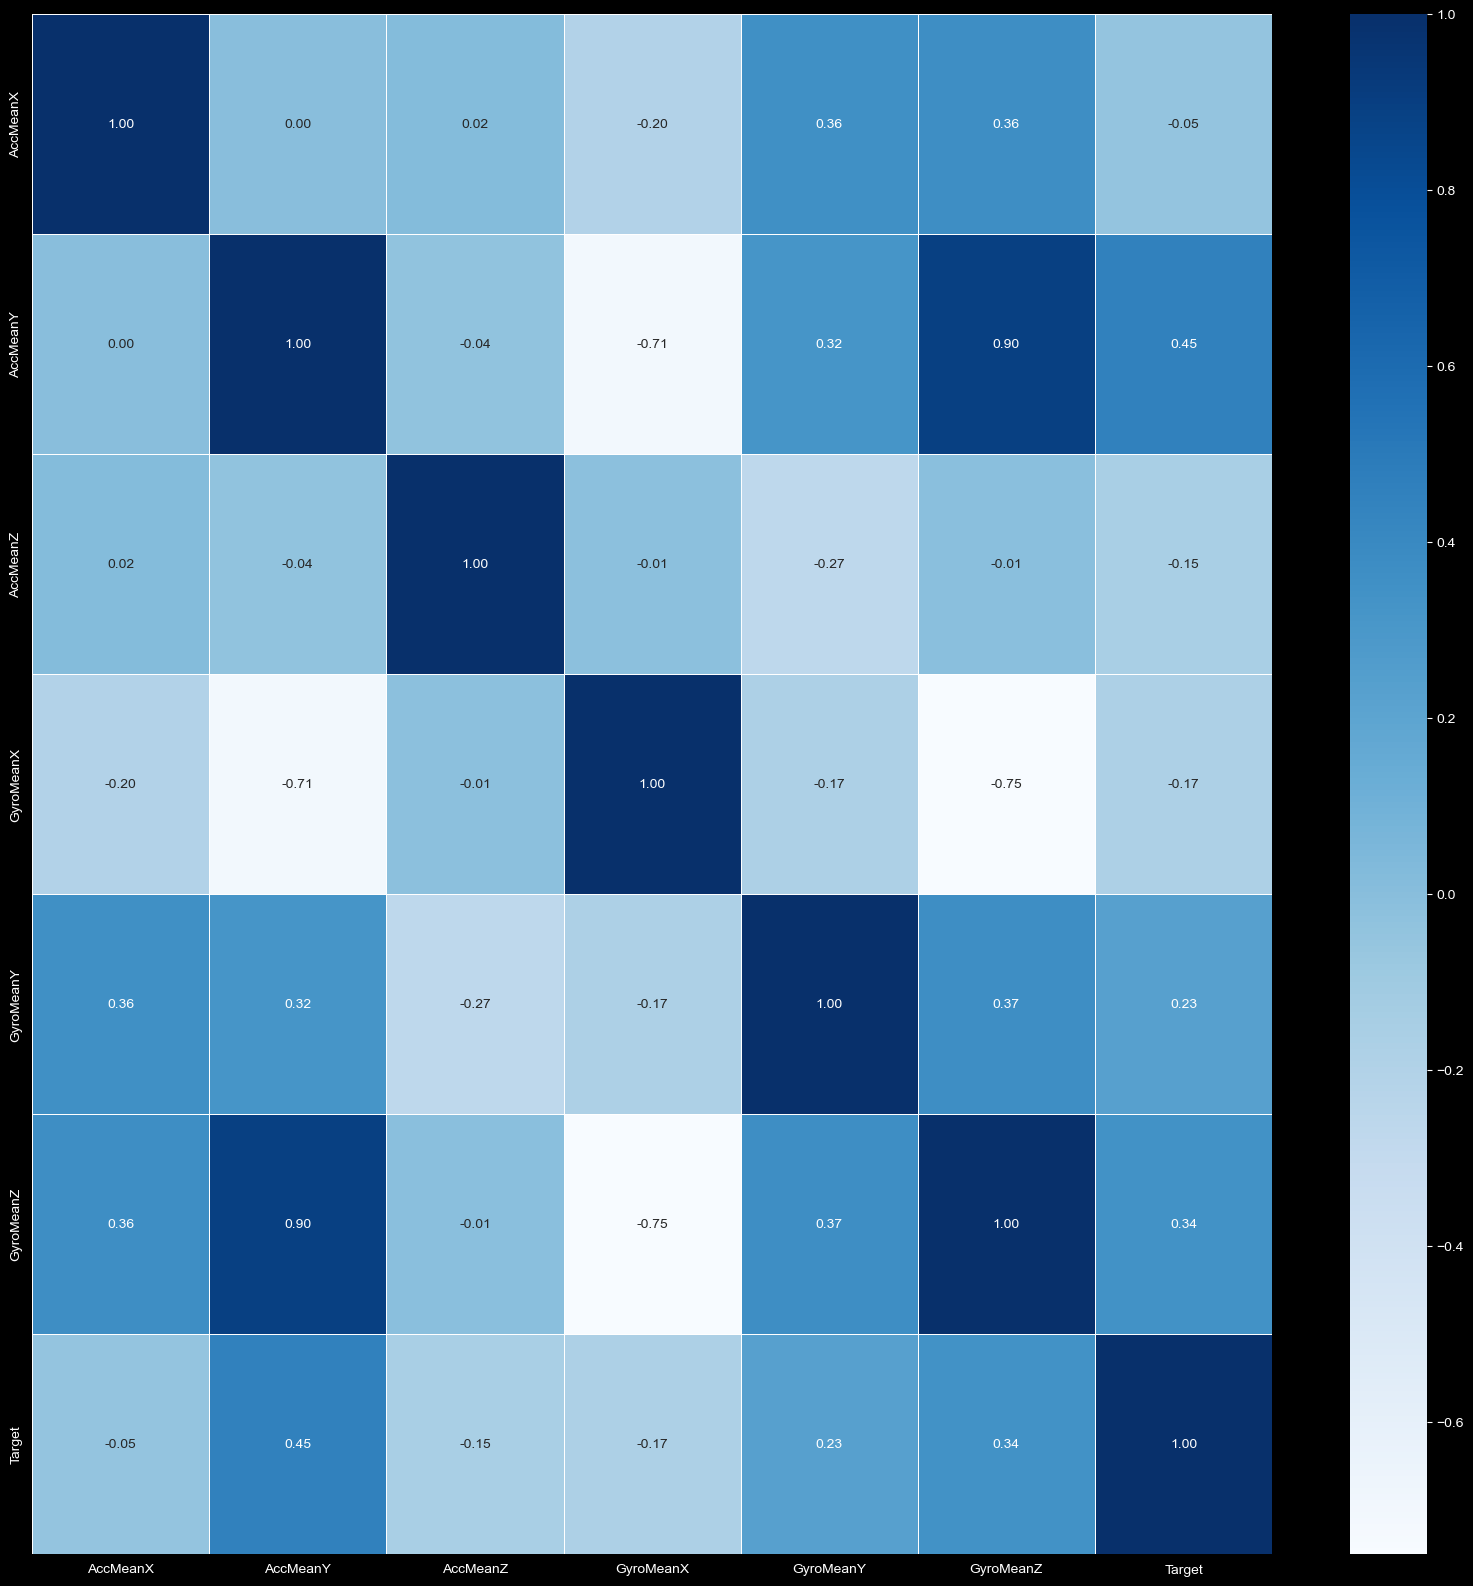

In [17]:
new_corr = data_filtered.corr()
plt.figure(figsize=(20, 20))
sns.heatmap(new_corr, annot=True, fmt=".2f", cmap="Blues", linewidths=0.5)

## Building Model

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [19]:
RFCmodel = RandomForestClassifier(n_estimators=100, random_state=42)
XGBmodel = XGBClassifier(objective="multi:softmax", num_class=4)
SVCmodel = SVC(kernel='rbf', decision_function_shape='ovr')

In [20]:
X = data_filtered.drop("Target", axis=1)
y = data_filtered.Target

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33)

In [22]:
RFCmodel.fit(X_train, y_train)
SVCmodel.fit(X_train, y_train)

SVC()

In [23]:
y_pred_RFC = RFCmodel.predict(X_test)
accuracyRFC = accuracy_score(y_test, y_pred_RFC)
print(f"Accuracy: {accuracyRFC:.2f}")

Accuracy: 1.00


In [24]:
print(classification_report(y_test, y_pred_RFC))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00      1432
           2       1.00      1.00      1.00      1614
           3       1.00      1.00      1.00      1878
           4       1.00      1.00      1.00      1259

    accuracy                           1.00      6183
   macro avg       1.00      1.00      1.00      6183
weighted avg       1.00      1.00      1.00      6183



In [25]:
y_pred_SVC = SVCmodel.predict(X_test)
accuracySVC = accuracy_score(y_test, y_pred_SVC)
print(f"Accuracy: {accuracySVC:.2f}")

Accuracy: 0.85


In [26]:
print(classification_report(y_test, y_pred_SVC))

              precision    recall  f1-score   support

           1       0.71      0.77      0.74      1432
           2       1.00      0.98      0.99      1614
           3       0.99      0.83      0.90      1878
           4       0.71      0.82      0.76      1259

    accuracy                           0.85      6183
   macro avg       0.85      0.85      0.85      6183
weighted avg       0.87      0.85      0.86      6183



In [27]:
import joblib

In [28]:
joblib.dump(SVCmodel, "SVC.joblib")
joblib.dump(RFCmodel, "RFC.joblib")

['RFC.joblib']